In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [2]:
# 予想したい日の前日
filedateP = '20220311'
# 結果当日
filedateC = '20220314'

In [3]:
# 予想のために作成したinputデータ（予想したい日の前日）
df_inputai_p = pd.read_csv('data/inputAI2_' + filedateP + '.csv', index_col=0, header=[0], parse_dates=[0])

In [4]:
# 機械学習で得た予想結果
predict = np.loadtxt('data/predict_' + filedateP + '.csv', delimiter=',')

In [5]:
row_indices = df_inputai_p.index.values
column_names = ['predict']
df_pred = pd.DataFrame(predict, index=row_indices ,columns=column_names)

In [6]:
df_merge = pd.merge(df_inputai_p, df_pred, left_index=True, right_index=True)

In [7]:
pd.set_option('display.max_rows', 60) 
# defult:60,制限なし:None
pd.set_option('display.max_columns', None) 
# defult:20,制限なし:None

In [8]:
df_merge['pre_val'] = round(df_merge['AdjClose_c'] * df_merge['predict'] + df_merge['AdjClose_c'])

In [9]:
# 値が0より小さかったら-それ以外だったらプラスを返す
def value_sign(pre_value):
    predict = pre_value
    if predict < 0:
        return 'negative'
    else:
        return 'growth'

df_merge['pre_sign'] = df_merge['predict'].apply(value_sign)

In [10]:
df_merge

,PER,PBR,HAITO,ROE_x,ROA_x,MA05,MA25,MA75,RSI,key,AdjClose_c,Close_c,High_c,Low_c,Open_c,Volume_c,AdjClose_p,Close_p,High_p,Low_p,Open_p,Volume_p,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,INDR4,TSPLB,TSPLS,PIN80B,PIN80S,Diff,総資産,純資産,株主資本,利益剰余金,短期借入金,長期借入金,BPS,自己資本比率,営業CF,投資CF,財務CF,設備投資,現金同等物,営業CFマージン,売上高,営業利益,経常利益,純利益,EPS,ROE_y,ROA_y,一株配当,剰余金の配当,自社株買い,配当性向,総還元性向,純資産配当率,date,終値,始値,高値,安値,前日比%,終値.1,始値.1,高値.1,安値.1,前日比%.1,終値.2,始値.2,高値.2,安値.2,前日比%.2,終値.3,始値.3,高値.3,安値.3,前日比%.3,終値.4,始値.4,高値.4,安値.4,前日比%.4,終値.5,始値.5,高値.5,安値.5,前日比%.5,終値.6,始値.6,高値.6,安値.6,出来高,前日比%.6,終値.7,始値.7,高値.7,安値.7,出来高.1,前日比%.7,終値.8,始値.8,高値.8,安値.8,出来高.2,前日比%.8,終値.9,始値.9,高値.9,安値.9,出来高.3,前日比%.9,終値.10,始値.10,高値.10,安値.10,出来高.4,前日比%.10,終値.11,始値.11,高値.11,安値.11,出来高.5,前日比%.11,predict,pre_val,pre_sign
コード,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1301,9.09,0.86,2.47,10.5,4.3,0.03,0.59,4.00,53.66,1301.T,3245.0,3245.0,3265.0,3220.0,3220.0,21300.0,3265.0,3265.0,3270.0,3235.0,3260.0,20700.0,3215.0,3215.0,3250.0,3215.0,3225.0,20200.0,3225.0,3225.0,3270.0,3220.0,3250.0,39600.0,3270.0,3270.0,3270.0,3220.0,3220.0,34200.0,3220.0,3220.0,3245.0,3210.0,3225.0,25400.0,3230.0,3230.0,3255.0,3225.0,3225.0,14200.0,3225.0,3225.0,3245.0,3210.0,3210.0,13200.0,3250.0,3250.0,3280.0,3240.0,3270.0,17800.0,3265.0,3265.0,3265.0,3170.0,3180.0,28700.0,0,0,0,0,0,-0.006163,1.163310e+11,3.997500e+10,3.530000e+10,2.873700e+10,8.056000e+09,3.272000e+10,3753.75,34.7,5.997000e+09,-5.270000e+08,-4.627000e+09,0.000000e+00,7.097000e+09,2.41,2.491970e+11,4.657000e+09,4.879000e+09,3.838000e+09,356.90,9.50,3.30,80.0,7.540000e+08,82000000.0,19.65,21.78,2.4,20220311,85.5,85.39,85.9,85.25,0.07,127.94,127.56,129.05,127.53,0.31,1.0909,1.0984,1.1044,1.0901,-0.67,152.89,151.99,153.43,151.93,0.63,7.9126,7.8254,7.982,7.7612,1.33,117.28,116.14,117.37,116.1,0.99,32943.33,33279.72,33514.0,32918.42,0.0,-0.69,25162.78,25495.03,25503.65,24966.5,0.0,-2.05,25090.0,25480.0,25500.0,24720.0,0.0,-2.53,7063.6,7130.8,7151.4,7051.2,0.0,-0.94,13628.11,13479.69,13943.97,13407.97,0.0,1.38,99.13,98.47,99.155,98.26,0.0,0.64,0.021918,3316.0,growth
1376,12.70,0.84,1.86,6.8,3.7,0.68,1.38,5.84,48.57,1376.T,1563.0,1563.0,1599.0,1506.0,1506.0,11300.0,1581.0,1581.0,1581.0,1510.0,1510.0,9700.0,1489.0,1489.0,1558.0,1480.0,1558.0,15500.0,1531.0,1531.0,1610.0,1512.0,1610.0,30000.0,1598.0,1598.0,1618.0,1563.0,1563.0,29500.0,1540.0,1540.0,1585.0,1518.0,1518.0,11300.0,1509.0,1509.0,1519.0,1505.0,1506.0,4900.0,1502.0,1502.0,1516.0,1501.0,1509.0,4700.0,1513.0,1513.0,1570.0,1513.0,1570.0,6900.0,1570.0,1570.0,1580.0,1555.0,1556.0,12200.0,0,0,0,0,0,-0.011516,4.745203e+10,2.169695e+10,2.083818e+10,1.771199e+10,0.000000e+00,0.000000e+00,1859.82,45.7,2.294651e+09,-8.389950e+08,-3.847630e+08,-1.028317e+09,5.486002e+09,3.78,6.077909e+10,1.661398e+09,1.765679e+09,1.436066e+09,123.09,6.62,3.03,29.0,3.286890e+08,781000.0,22.89,22.94,1.6,20220311,85.5,85.39,85.9,85.25,0.07,127.94,127.56,129.05,127.53,0.31,1.0909,1.0984,1.1044,1.0901,-0.67,152.89,151.99,153.43,151.93,0.63,7.9126,7.8254,7.982,7.7612,1.33,117.28,116.14,117.37,116.1,0.99,32943.33,33279.72,33514.0,32918.42,0.0,-0.69,25162.78,25495.03,25503.65,24966.5,0.0,-2.05,25090.0,25480.0,25500.0,24720.0,0.0,-2.53,7063.6,7130.8,7151.4,7051.2,0.0,-0.94,13628.11,13479.69,13943.97,13407.97,0.0,1.38,99.13,98.47,99.155,98.26,0.0,0.64,0.022199,1598.0,growth
1377,21.11,1.44,1.05,7.2,7.9,4.00,6.41,8.96,67.26,1377.T,3615.0,3615.0,3625.0,3550.0,3570.0,147600.0,3540.0,3540.0,3540.0,3495.0,3505.0,162700.0,3455.0,3455.0,3470.0,3375.0,3380.0,178900.0,3365.0,3365.0,3445.0,3360.0,3390.0,160400.0,3405.0,3405.0,3430.0,3380.0,3385.0,132400.0,3425.0,3425.0,3450.0,3415.0,3430.0,133900.0,3440.0,3440.0,3440.0,3405.0,3430.0,102000.0,3380.0,3380.0,3390.0,3345.0,3350.0,61000.0,3355.0,3355.0,3385.0,3355.0,3380.0,47200.0,337

In [11]:
# 実際の結果データ
df_inputai_c = pd.read_csv('data/inputAI_' + filedateC + '.csv', index_col=0, header=[0], parse_dates=[0])

In [12]:
# 配列内の各要素に含まれる特定の文字列を置換・削除する場合、単純なreplaceだとエラーになる
colums_list = df_inputai_c.columns
string = ",".join(colums_list)
string_new = string.replace('AdjClose_c,', '')
colums_list_new = string_new.split(",")

In [13]:
df_inputai_c.drop(columns=colums_list_new, inplace=True)

In [14]:
df_inputai_c.rename(columns={'AdjClose_c': 'res_val'}, inplace=True)

In [15]:
df_merge2 = pd.merge(df_merge, df_inputai_c, left_index=True, right_index=True)

In [16]:
# 値が0より小さかったら-それ以外だったらプラスを返す
def result_sign(input_value):
    adj, res_val = input_value
    if res_val - adj < 0:
        return 'negative'
    else:
        return 'growth'

df_merge2['res_sign'] = df_merge2[['AdjClose_c','res_val']].apply(result_sign, axis=1)

In [17]:
df_merge2['error'] = df_merge2['res_val'] - df_merge2['pre_val']

In [18]:
df_merge2['match_sign'] = df_merge2['res_sign'] == df_merge2['pre_sign']

In [19]:
df_merge2

,PER,PBR,HAITO,ROE_x,ROA_x,MA05,MA25,MA75,RSI,key,AdjClose_c,Close_c,High_c,Low_c,Open_c,Volume_c,AdjClose_p,Close_p,High_p,Low_p,Open_p,Volume_p,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,INDR4,TSPLB,TSPLS,PIN80B,PIN80S,Diff,総資産,純資産,株主資本,利益剰余金,短期借入金,長期借入金,BPS,自己資本比率,営業CF,投資CF,財務CF,設備投資,現金同等物,営業CFマージン,売上高,営業利益,経常利益,純利益,EPS,ROE_y,ROA_y,一株配当,剰余金の配当,自社株買い,配当性向,総還元性向,純資産配当率,date,終値,始値,高値,安値,前日比%,終値.1,始値.1,高値.1,安値.1,前日比%.1,終値.2,始値.2,高値.2,安値.2,前日比%.2,終値.3,始値.3,高値.3,安値.3,前日比%.3,終値.4,始値.4,高値.4,安値.4,前日比%.4,終値.5,始値.5,高値.5,安値.5,前日比%.5,終値.6,始値.6,高値.6,安値.6,出来高,前日比%.6,終値.7,始値.7,高値.7,安値.7,出来高.1,前日比%.7,終値.8,始値.8,高値.8,安値.8,出来高.2,前日比%.8,終値.9,始値.9,高値.9,安値.9,出来高.3,前日比%.9,終値.10,始値.10,高値.10,安値.10,出来高.4,前日比%.10,終値.11,始値.11,高値.11,安値.11,出来高.5,前日比%.11,predict,pre_val,pre_sign,res_val,res_sign,error,match_sign
コード,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1301,9.09,0.86,2.47,10.5,4.3,0.03,0.59,4.00,53.66,1301.T,3245.0,3245.0,3265.0,3220.0,3220.0,21300.0,3265.0,3265.0,3270.0,3235.0,3260.0,20700.0,3215.0,3215.0,3250.0,3215.0,3225.0,20200.0,3225.0,3225.0,3270.0,3220.0,3250.0,39600.0,3270.0,3270.0,3270.0,3220.0,3220.0,34200.0,3220.0,3220.0,3245.0,3210.0,3225.0,25400.0,3230.0,3230.0,3255.0,3225.0,3225.0,14200.0,3225.0,3225.0,3245.0,3210.0,3210.0,13200.0,3250.0,3250.0,3280.0,3240.0,3270.0,17800.0,3265.0,3265.0,3265.0,3170.0,3180.0,28700.0,0,0,0,0,0,-0.006163,1.163310e+11,3.997500e+10,3.530000e+10,2.873700e+10,8.056000e+09,3.272000e+10,3753.75,34.7,5.997000e+09,-5.270000e+08,-4.627000e+09,0.000000e+00,7.097000e+09,2.41,2.491970e+11,4.657000e+09,4.879000e+09,3.838000e+09,356.90,9.50,3.30,80.0,7.540000e+08,82000000.0,19.65,21.78,2.4,20220311,85.5,85.39,85.9,85.25,0.07,127.94,127.56,129.05,127.53,0.31,1.0909,1.0984,1.1044,1.0901,-0.67,152.89,151.99,153.43,151.93,0.63,7.9126,7.8254,7.982,7.7612,1.33,117.28,116.14,117.37,116.1,0.99,32943.33,33279.72,33514.0,32918.42,0.0,-0.69,25162.78,25495.03,25503.65,24966.5,0.0,-2.05,25090.0,25480.0,25500.0,24720.0,0.0,-2.53,7063.6,7130.8,7151.4,7051.2,0.0,-0.94,13628.11,13479.69,13943.97,13407.97,0.0,1.38,99.13,98.47,99.155,98.26,0.0,0.64,0.021918,3316.0,growth,3240.0,negative,-76.0,False
1376,12.70,0.84,1.86,6.8,3.7,0.68,1.38,5.84,48.57,1376.T,1563.0,1563.0,1599.0,1506.0,1506.0,11300.0,1581.0,1581.0,1581.0,1510.0,1510.0,9700.0,1489.0,1489.0,1558.0,1480.0,1558.0,15500.0,1531.0,1531.0,1610.0,1512.0,1610.0,30000.0,1598.0,1598.0,1618.0,1563.0,1563.0,29500.0,1540.0,1540.0,1585.0,1518.0,1518.0,11300.0,1509.0,1509.0,1519.0,1505.0,1506.0,4900.0,1502.0,1502.0,1516.0,1501.0,1509.0,4700.0,1513.0,1513.0,1570.0,1513.0,1570.0,6900.0,1570.0,1570.0,1580.0,1555.0,1556.0,12200.0,0,0,0,0,0,-0.011516,4.745203e+10,2.169695e+10,2.083818e+10,1.771199e+10,0.000000e+00,0.000000e+00,1859.82,45.7,2.294651e+09,-8.389950e+08,-3.847630e+08,-1.028317e+09,5.486002e+09,3.78,6.077909e+10,1.661398e+09,1.765679e+09,1.436066e+09,123.09,6.62,3.03,29.0,3.286890e+08,781000.0,22.89,22.94,1.6,20220311,85.5,85.39,85.9,85.25,0.07,127.94,127.56,129.05,127.53,0.31,1.0909,1.0984,1.1044,1.0901,-0.67,152.89,151.99,153.43,151.93,0.63,7.9126,7.8254,7.982,7.7612,1.33,117.28,116.14,117.37,116.1,0.99,32943.33,33279.72,33514.0,32918.42,0.0,-0.69,25162.78,25495.03,25503.65,24966.5,0.0,-2.05,25090.0,25480.0,25500.0,24720.0,0.0,-2.53,7063.6,7130.8,7151.4,7051.2,0.0,-0.94,13628.11,13479.69,13943.97,13407.97,0.0,1.38,99.13,98.47,99.155,98.26,0.0,0.64,0.022199,1598.0,growth,1610.0,growth,12.0,True
1377,21.11,1.44,1.05,7.2,7.9,4.00,6.41,8.96,67.26,1377.T,3615.0,3615.0,3625.0,3550.0,3570.0,147600.0,3540.0,3540.0,3540.0,3495.0,3505.0,162700.0,3455.0,3455.0,3470.0,3375.0,3380.0,178900.0,3365.0,3365.0,3445.0,3360.0,3390.0,160400.0,3405.0,3405.0,3430.0,3380.0,3385.0,132400.0,3425.0,3425.0,3450.0,3415.0,3430.0,133900.0,3440.0,3440.0,3440.0,3405.0,3430.0,102000.0

In [20]:
# 行数
print('全体の行数は、{:0.0f}'.format(len(df_merge2)))
#予想と結果の符号が一致
# print('予想と結果の符号が一致した行数は、{:0.0f}'.format((df_merge2['pre_sign'] == df_merge2['res_sign']).sum()))
print('予想と結果の符号が一致した行数は、{:0.0f}'.format(df_merge2['match_sign'].sum()))

全体の行数は、1882
予想と結果の符号が一致した行数は、1277


In [21]:
result_per = df_merge2['match_sign'].sum() / len(df_merge2)*100
print('予想と結果の符号が一致となった割合は、{:0.2f}%'.format(result_per))

予想と結果の符号が一致となった割合は、67.85%


In [22]:
# 必要なモジュールをインポートします。
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


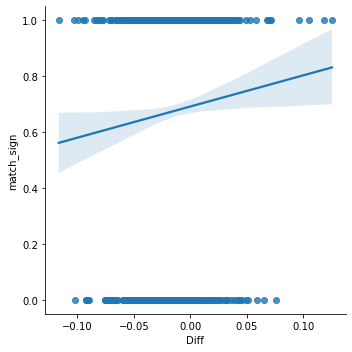

In [23]:
# 年齢と生存率のグラフを描いてみましょう。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.lmplot('Diff','match_sign',data=df_merge2)

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TSPLS', ylabel='count'>

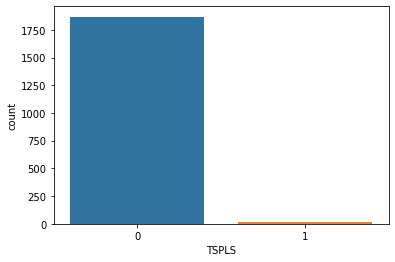

In [24]:
# 正負予想の数を分類します。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.countplot('TSPLS',data=df_merge2)

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='match_sign', ylabel='count'>

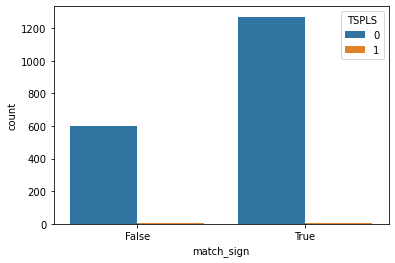

In [25]:
# 正負予想の数を分類します。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.countplot('match_sign',hue='TSPLS',data=df_merge2)

<AxesSubplot:>

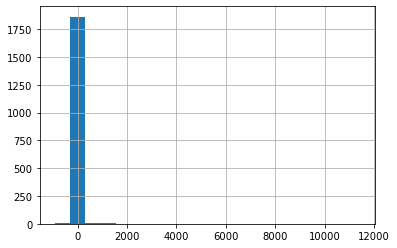

In [26]:
# pandasで簡単にヒストグラムを描く方法です。
df_merge2['error'].hist(bins=20)

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


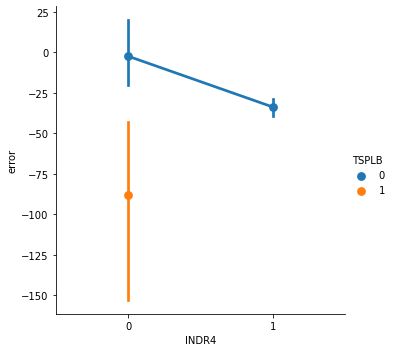

In [27]:
# こういった解析には、factorplotが便利です。
sns.factorplot('INDR4','error',hue='TSPLB',data=df_merge2, order=[0,1])

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


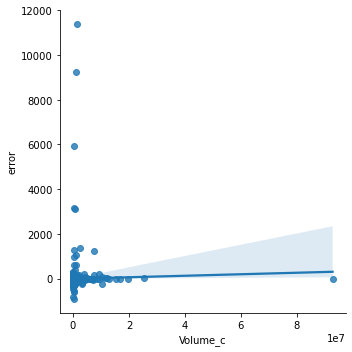

In [28]:
# 出来高と誤差率のグラフを描いてみましょう。
sns.lmplot('Volume_c','error',data=df_merge2)

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


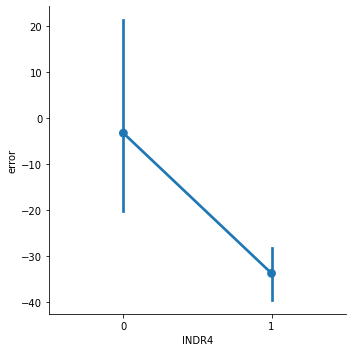

In [29]:
# こういった解析には、factorplotが便利です。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.factorplot('INDR4','error',data=df_merge2, order=[0,1])

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


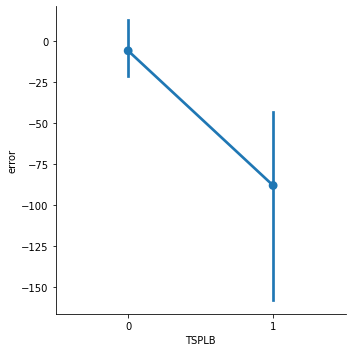

In [30]:
# こういった解析には、factorplotが便利です。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.factorplot('TSPLB','error',data=df_merge2, order=[0,1])

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


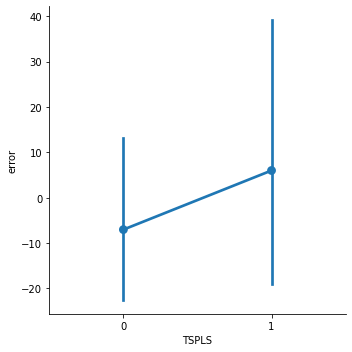

In [31]:
# こういった解析には、factorplotが便利です。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.factorplot('TSPLS','error',data=df_merge2, order=[0,1])

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


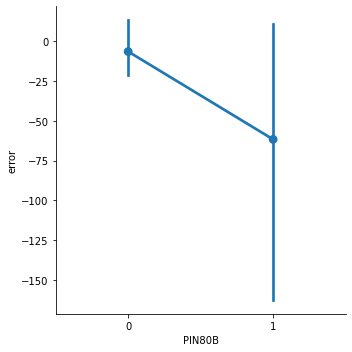

In [32]:
# こういった解析には、factorplotが便利です。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.factorplot('PIN80B','error',data=df_merge2, order=[0,1])

C:\Users\ricew\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ricew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


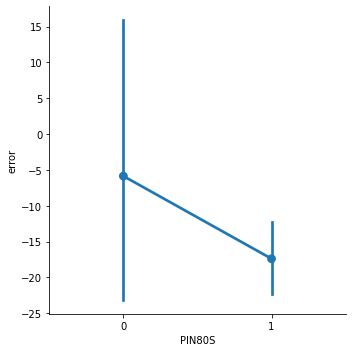

In [33]:
# こういった解析には、factorplotが便利です。
# INDR4,TSPLB,TSPLS,PIN80B,PIN80S
sns.factorplot('PIN80S','error',data=df_merge2, order=[0,1])

In [34]:
df_merge.to_csv('data/preparation_' + filedateP + '.csv')

In [35]:
df_merge2.to_csv('data/result_' + filedateP + '.csv')